**Analysis of Spotify Top 50 Songs Dataset (2021)**

- Effect of <font color='yellow'>individual</font> inputs on <font color='red'>"popularity"</font>.
- Influence of <font color='yellow'>multiple</font> input combinations.

---

**Analyse des Datensatzes der Top 50 Spotify-Songs (2021)**

- Auswirkung <font color='yellow'>einzelner</font> Eingaben auf die <font color='red'>"Beliebtheit"</font>.
- Einfluss von <font color='yellow'>mehreren</font> Eingabekombinationen.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



In [3]:
dfSpotify = pd.read_csv("spotify_top50_2021.csv")



# Ursprüngliche Werte
#x = [-100, -20, -1, ...]

# Berechnung der neuen Werte
#min_x = min(x)
#max_x = max(x)
#y = [(n - min_x) / (max_x - min_x) for n in x]





**Normalization of Dataset:**

- This dataset is normalized x ∈ [0,1].

---

**Normalisierung des Datensatzes:**

- Dieser Datensatz wird normalisiert x ∈ [0,1] liegt.

In [4]:
#df.loc[nameRow] row   , df.loc[:,nameColumn] column
#df.iloc[index] row      , df.iloc[:,index] column

def normalizer(dfIn):
  dfOut = (dfIn - dfIn.min()) / (dfIn.max() - dfIn.min())
  return dfOut

#Alles, was noch nicht normiert ist:
dfL = dfLoudness_unnormed = dfSpotify.iloc[:,8]
dfS = dfSpeechiness_unnormed = dfSpotify.iloc[:,10]
dfI = dfInstrumentalness_unnormed = dfSpotify.iloc[:,12]
dfT = dfSpotify.iloc[:,15]
dfD = dfSpotify.iloc[:,16]
dfP = dfSpotify.iloc[:,4]

dfName = dfSpotify.iloc[:,1]
dfTrack_Name = dfSpotify.iloc[:,2]
#Normierte Daten
dfPopularity = normalizer(dfP)
dfDanceability = dfSpotify.iloc[:,5]
dfEnergy = dfSpotify.iloc[:,6]
dfLoudness = normalizer(dfL)
dfMajorMinor = dfSpotify.iloc[:,9]
dfSpeechiness = normalizer(dfS)
dfAcousticness = dfSpotify.iloc[:,11]
dfInstrumentalness = normalizer(dfI)
dfMood = dfSpotify.iloc[:,14]
dfTempo = normalizer(dfT)
dfDuration = normalizer(dfD)




#new df Noramlized

dfNorm = pd.concat([dfName, dfTrack_Name, dfPopularity, dfDanceability, dfEnergy, dfLoudness, dfMajorMinor, dfSpeechiness, dfAcousticness, dfInstrumentalness, dfMood, dfTempo, dfDuration], axis=1)


**Heatmap Analysis of Variable Influence on "Popularity":**

- The variable with the greatest impact is <font color='yellow'>"mode"</font>.
- <font color='yellow'>Major keys (Dur-Tonart)</font> exhibit the <font color='yellow'>highest positive correlation</font>.

**Example of Major and Minor Keys:**

You can find an example [here](https://www.youtube.com/watch?v=8i80T2inEwA).

---

**Heatmap-Analyse des Einflusses von Variablen auf "Beliebtheit":**

- Die Variable mit dem größten Einfluss ist <font color='yellow'>"Mode"</font>.
- <font color='yellow'>Dur-Tonarten</font> weisen die <font color='yellow'>höchste positive Korrelation</font> auf.

**Beispiel für Dur und Moll:**

Ein Beispiel finden Sie [hier](https://www.youtube.com/watch?v=8i80T2inEwA).

<ipython-input-5-752d12a6417f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfNorm.corr()
<ipython-input-5-752d12a6417f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfNorm.corr(), annot=True, fmt='.2f')


<Axes: >

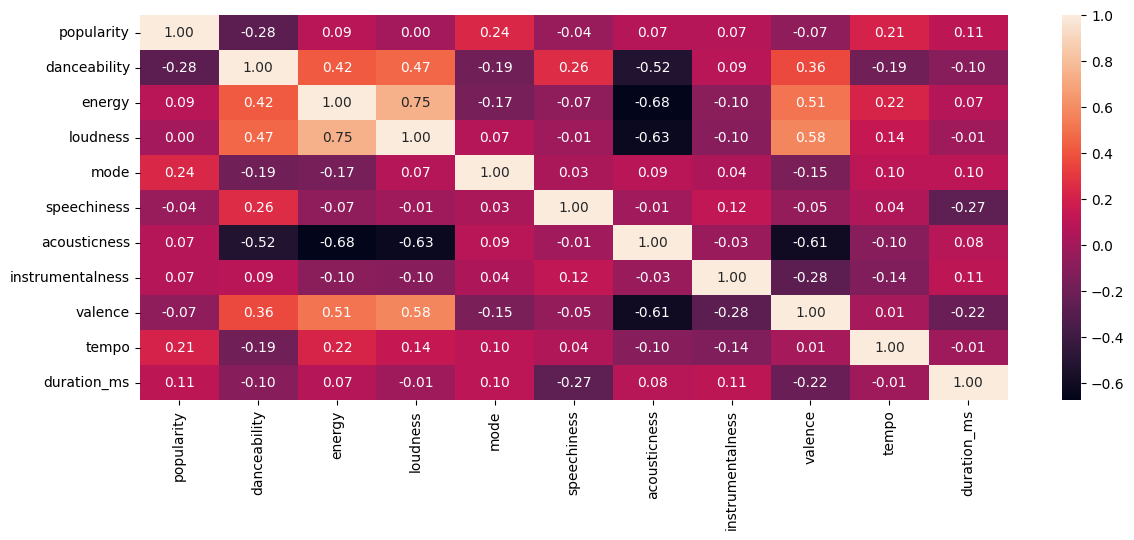

In [5]:
dfNorm.corr()
plt.figure(figsize=(14,5))
sns.heatmap(dfNorm.corr(), annot=True, fmt='.2f')

**Strong Correlations**

**acousticness & Energy** - <font color='red'>negative correlation</font>  
acousticness Meaning:  
1. High value: more instruments, less electronic  
2. Low value: more electronic, fewer instruments  

**loudness & Energy** - <font color='green'>positive correlation</font>  

---

**Besonders starke Korrelationen**

**acousticness & Energy** - <font color='red'>negative correlation</font>  
Bedeutung von acousticness:  
1. Hoher Wert: mehr Instrumente, weniger elektronische Elemente  
2. Niedriger Wert: mehr elektronische Elemente, weniger Instrumente  

**loudness & Energy** - <font color='green'>positive correlation</font>  

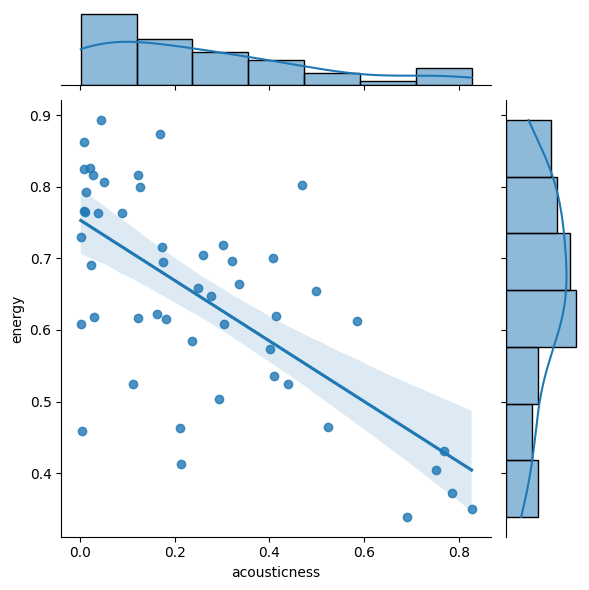

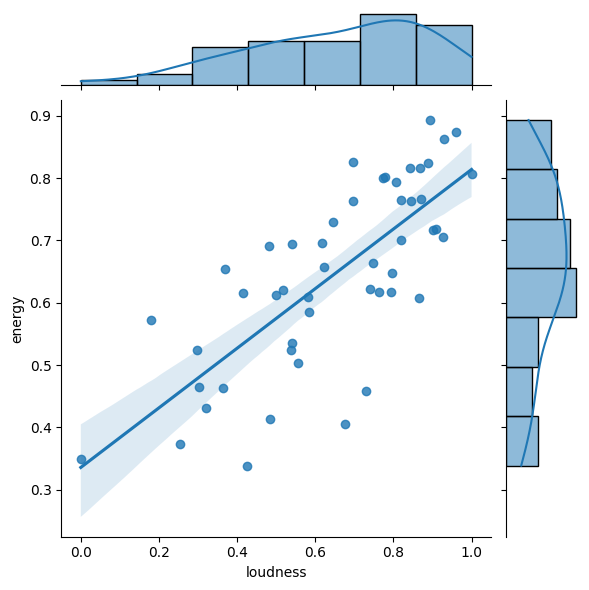

In [6]:
sns.jointplot(x='acousticness',y='energy',data=dfNorm,kind='reg')
sns.jointplot(x='loudness',y='energy',data=dfNorm,kind='reg')


plt.show()


**Unnormalized Heatmap:**

- Eine <font color='yellow'>unnormierte Heatmap</font> ist ungenau und enthält andere Werte.

---

**Unnormierte Heatmap:**

- Eine <font color='yellow'>unnormierte Heatmap</font> ist ungenau und enthält andere Werte.

<ipython-input-7-2c16c7b55dad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfSpotify.corr()
<ipython-input-7-2c16c7b55dad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfSpotify.corr(), annot=True, fmt='.2f')


<Axes: >

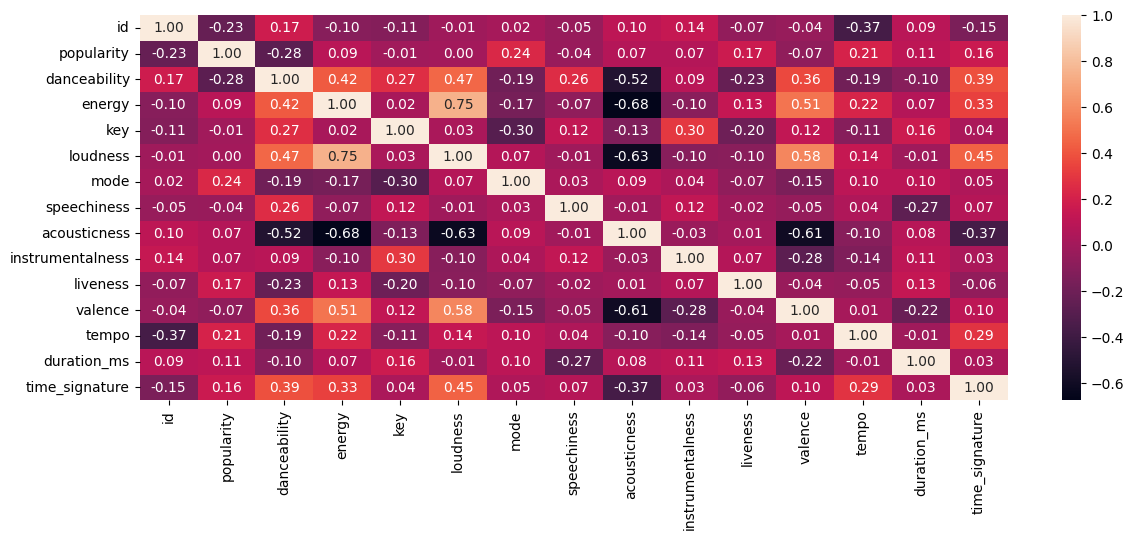

In [7]:
dfSpotify.corr()
plt.figure(figsize=(14,5))
sns.heatmap(dfSpotify.corr(), annot=True, fmt='.2f')

**Multi-Variable Analysis:**

- Analogy for understanding:
- Plant growth: When analyzing plant growth, it's not just <font color='yellow'>water</font> or <font color='yellow'>sunlight</font> that matters, but the combination of both.
- Now, we'll create all combinations with up to 3 different <font color='yellow'>inputs</font> to analyze the multivariable influences on "popularity".

---

**Multi-Variable Analyse:**

- Zur Verständnise ine Analogie:
- Pflanzenwachstum: Beim Analysieren des Pflanzenwachstums ist es nicht nur <font color='yellow'>Wasser</font> oder <font color='yellow'>Sonnenlicht</font>, das zählt, sondern die Kombination aus beiden.
- Nun werden wir alle Kombinationen mit bis zu 3 verschiedenen <font color='yellow'>Inputs</font> erstellen, um die multivariablen Einflüsse auf "popularity" zu analysieren.

In [8]:
import itertools

# Liste aller Spaltennamen im DataFrame außer der Output-Spalte "popularity"
input_columns = dfNorm.columns[3:]

# Definiere die maximale Anzahl von Variablen in einer Kombination
max_variables_in_combination = 3  # Du kannst hier die maximale Anzahl nach deinen Bedürfnissen ändern

# Erstelle eine Liste von Variablenkombinationen
variable_combinations = []
for r in range(1, max_variables_in_combination + 1):
    variable_combinations.extend(itertools.combinations(input_columns, r))

# Zeige die Liste von Variablenkombinationen an
print(variable_combinations)





[('danceability',), ('energy',), ('loudness',), ('mode',), ('speechiness',), ('acousticness',), ('instrumentalness',), ('valence',), ('tempo',), ('duration_ms',), ('danceability', 'energy'), ('danceability', 'loudness'), ('danceability', 'mode'), ('danceability', 'speechiness'), ('danceability', 'acousticness'), ('danceability', 'instrumentalness'), ('danceability', 'valence'), ('danceability', 'tempo'), ('danceability', 'duration_ms'), ('energy', 'loudness'), ('energy', 'mode'), ('energy', 'speechiness'), ('energy', 'acousticness'), ('energy', 'instrumentalness'), ('energy', 'valence'), ('energy', 'tempo'), ('energy', 'duration_ms'), ('loudness', 'mode'), ('loudness', 'speechiness'), ('loudness', 'acousticness'), ('loudness', 'instrumentalness'), ('loudness', 'valence'), ('loudness', 'tempo'), ('loudness', 'duration_ms'), ('mode', 'speechiness'), ('mode', 'acousticness'), ('mode', 'instrumentalness'), ('mode', 'valence'), ('mode', 'tempo'), ('mode', 'duration_ms'), ('speechiness', 'ac

**All Possible Combinations with up to 3 Different Inputs:**

- Over this text are <font color='yellow'>all possible combinations</font> with up to 3 different <font color='yellow'>inputs</font>.

---

**Alle möglichen Kombinationen mit bis zu 3 verschiedenen Inputs:**

- Über diesem Text sind <font color='yellow'>alle möglichen Kombinationen</font> mit bis zu 3 verschiedenen <font color='yellow'>Inputs</font>.

----
----
----


**Linear Regression Analysis:**

- We now take the associated data for each of the <font color='yellow'>combination vectors</font>, train a <font color='yellow'>linear regression model</font> with these data, a perfectly fitting line with the least distance to the data points, and compare how well each data set predicts whether there is a correlation to <font color='yellow'>"popularity"</font>.

---

**Lineare Regressionsanalyse:**

- Wir nehmen uns jetzt zu jedem der <font color='yellow'>kombinationsvektoren</font> die dazugehörigen <font color='yellow'>Daten</font>, trainieren mit diesen Daten jeweils ein <font color='yellow'>lineares Regressionsmodell</font>, eine perfekt passende Linie mit dem geringsten Abstand zu den Datenpunkten, und vergleichen, wie gut jedes Datenpaket darin ist, vorherzusagen, ob es eine Korrelation zu <font color='yellow'>"popularity"</font> gibt.

In [9]:
#df.loc[nameRow] row   , df.loc[:,nameColumn] column
#df.iloc[index] row      , df.iloc[:,index] column

best_combination = None
best_score = float('-inf')

for combination in variable_combinations:
    # Trainiere das Modell mit der aktuellen Variablenkombination

    X = dfNorm.loc[:,list(combination)].values
    y = dfNorm['popularity'].values
    model = LinearRegression()
    model.fit(X, y)

    # Bewerte die Modellleistung
    score = model.score(X, y)  # Hier verwende ich den R^2-Wert als Beispielmetrik

    # Aktualisiere die beste Kombination, falls ein besseres Ergebnis gefunden wurde
    if score > best_score:
        best_score = score
        best_combination = combination

print("The following varriables in combination are best at predicting a high popularity")
print("Beste Variablenkombination:", best_combination)
print("R^2-Wert:", best_score)





The following varriables in combination are best at predicting a high popularity
Beste Variablenkombination: ('danceability', 'energy', 'mode')
R^2-Wert: 0.17092927867290386


**Low R-Squared Value:**

- The <font color='yellow'>R-squared value</font> is very low. This means that the individual data points are not particularly good at predicting <font color='yellow'>popularity</font>. There is therefore a low correlation, but nevertheless, there is still one.

---

**Niedriger R-Quadrat-Wert:**

- Der <font color='yellow'>R-Quadrat-Wert</font> ist sehr niedrig. Das bedeutet, dass die einzelnen Datenpunkte nicht besonders gut darin sind, die <font color='yellow'>Beliebtheit</font> vorherzusagen. Es besteht also eine geringe Korrelation, aber dennoch besteht eine.

---
---
---

**Observation on Danceability:**

- Very interesting is also to observe that <font color='yellow'>danceability</font> is included in the perfect data set: ('danceability', 'energy', 'mode'), but <font color='yellow'>danceability</font> alone has a negative correlation with <font color='yellow'>popularity</font>.

---

**Beobachtung zur Tanzbarkeit:**

- Sehr interessant ist auch zu beobachten, dass <font color='yellow'>Tanzbarkeit</font> im perfekten Datensatz enthalten ist: ('Tanzbarkeit', 'Energie', 'Modus'), aber <font color='yellow'>Tanzbarkeit</font> allein eine negative Korrelation zu <font color='yellow'>Beliebtheit</font> hat.

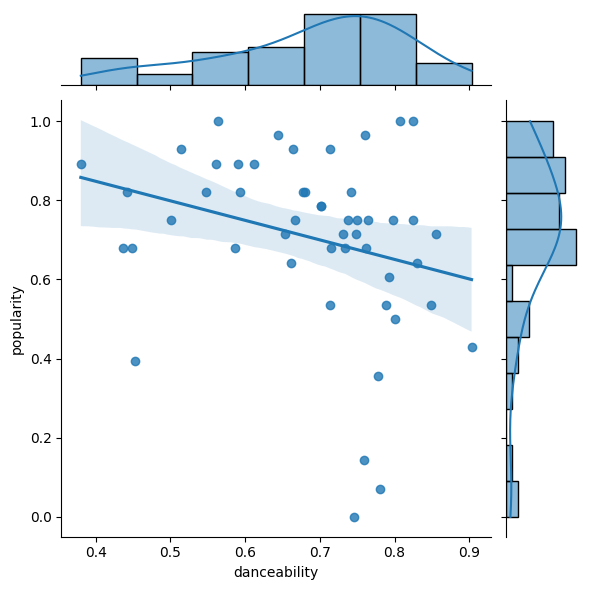

In [10]:
sns.jointplot(x='danceability',y='popularity',data=dfNorm,kind='reg')


plt.show()


**Conclusion of Analysis:**

This analysis concludes here. The following section contains just a few fun activities with <font color='yellow'>linear regression</font>.

---

**Analyseabschluss:**

Diese Analyse endet hier. Im folgenden Abschnitt findet man nur noch ein paar Spielereien mit <font color='yellow'>linearer Regression</font>.

📊✨💡

📊✨💡

In [11]:
dfNorm.shape # --> 50 Columns, 13 Rows

#Splitting into Testing and Training Data

X_Train = dfNorm.iloc[-6:,3:]
Y_Train = dfNorm.iloc[-6:,2:3]

X_Test = dfNorm.iloc[:-6,3:]
Y_Test = dfNorm.iloc[:-6,2:3]


model1 = LinearRegression()
model1.fit(X_Test,Y_Test)



LinearRegression()

- **R^2 (Coefficient of Determination)**:
  - Measures variance explained by model's predictions.
  (Linear summation of error distances)

- **MSE (Mean Squared Error)**:
  - Calculates average prediction inaccuracies squared.
  (So minimal errors are ignored and large errors are more heavily weighted)

In [12]:
predictions = model1.predict(X_Test)
r2 = r2_score(Y_Test, predictions)
mse = mean_squared_error(Y_Test, predictions)

print("Bestimmtheitsmaß (R^2):", r2)
print("Mittlerer quadratischer Fehler (MSE):", mse)

Bestimmtheitsmaß (R^2): 0.24583655047163866
Mittlerer quadratischer Fehler (MSE): 0.040530799951066454


In [13]:
predictions_df = pd.DataFrame(predictions)

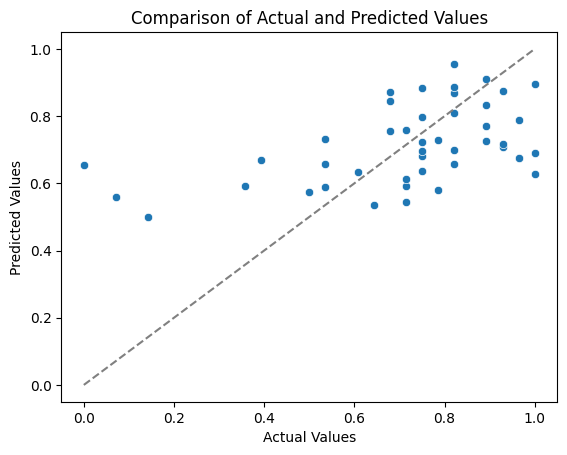

In [14]:
#df.loc[nameRow] row   , df.loc[:,nameColumn] column
#df.iloc[index] row      , df.iloc[:,index] column

sns.scatterplot(x=Y_Test.iloc[:,0], y=predictions_df.iloc[:,0])
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual and Predicted Values')
plt.show()
